# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [2]:
# Read the mouse data 
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
# Read the study results
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, how="outer", on="Mouse ID")
# Display the data table for preview
combined_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [5]:
# Checking the number of mice.
mice_number = combined_df["Mouse ID"].nunique()
mice_number

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ID = combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice_ID

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = combined_df.loc[combined_df["Mouse ID"]=="g989", :]
duplicate_mouse


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_id_to_delete = "g989"
clean_df = combined_df.drop(combined_df[combined_df["Mouse ID"] == mouse_id_to_delete].index)
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [9]:
# Checking the number of mice in the clean DataFrame.
#clean_mice = clean_df["Mouse ID"].nunique()
#clean_mice
clean_mice = clean_df["Mouse ID"].nunique()
clean_mice

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tum_vol_mean = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).mean()
tum_vol_median = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).median()
tum_vol_variance = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).var()
tum_vol_std = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).std()
tum_vol_sem = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats_df = pd.DataFrame({"Mean Tumor Volume":tum_vol_mean,
                                 "Median Tumor Volume":tum_vol_median,
                                 "Tumor Volume Variance":tum_vol_variance,
                                 "Tumor Volume Std. Dev.":tum_vol_std,
                                 "Tumor Volume Std. Err.":tum_vol_sem})
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_agg_df = clean_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
summary_stats_agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [13]:
mouse_timepoints = clean_df["Drug Regimen"].value_counts()
mouse_timepoints
#mouse_timepoints_df = pd.DataFrame(mouse_timepoints)
#mouse_timepoints_df

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

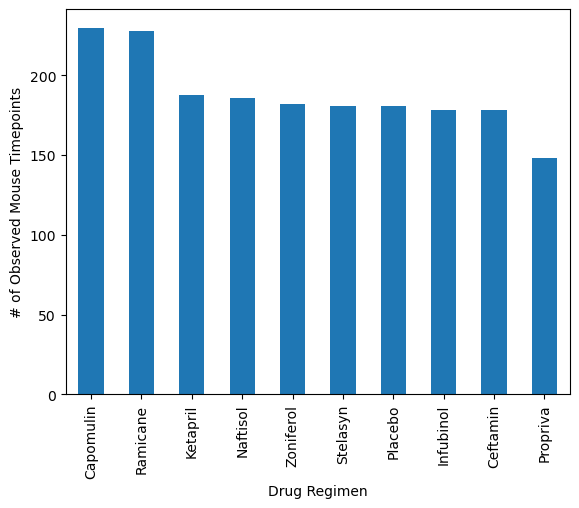

In [23]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Use DataFrame.plot() to create a bar chart
figure1 = mouse_timepoints.plot(kind="bar", figsize=(6.5, 5))
# Set a title and axes labels
figure1.set_xlabel("Drug Regimen")
figure1.set_ylabel("# of Observed Mouse Timepoints")  
# Configure x-tick rotation
xticklabels = mouse_timepoints.index
figure1.set_xticklabels(xticklabels, rotation='vertical')
plt.show()


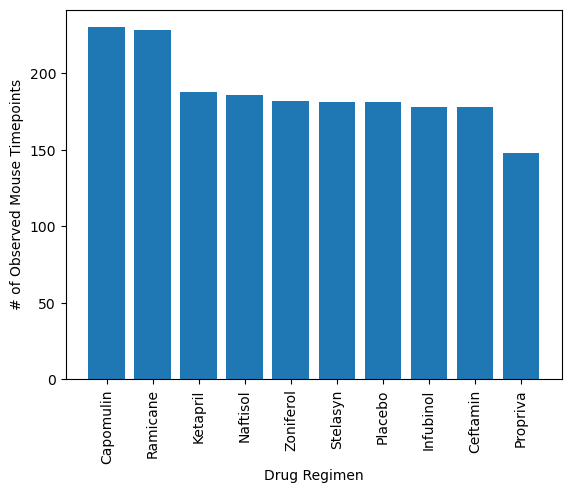

In [24]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mouse_timepoints.index.values
y_axis = mouse_timepoints.values

plt.bar(x_axis, y_axis, align='center')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation='vertical')

plt.show()


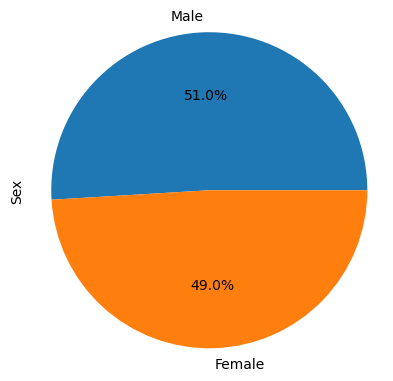

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mice_gender = clean_df["Sex"].value_counts()
mice_gender_df = mice_gender.to_frame()

mice_gender = mice_gender_df.plot(kind='pie', y="Sex", figsize=(4.5, 4.5), autopct="%1.1f%%", legend=None)

plt.axis("equal")
plt.show()

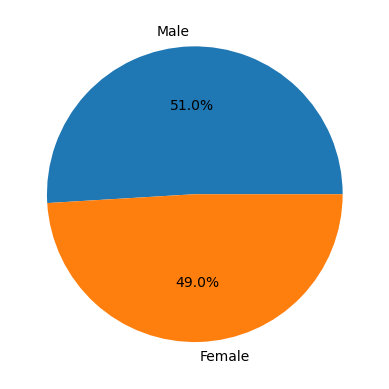

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_gender = clean_df["Sex"].value_counts()
labels=["Male", "Female"]

plt.pie(mice_gender, labels=labels, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [45]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", :]
Ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]

# Combine dataframes
drug_dataframes = [Capomulin_df, Ramicane_df, Infubinol_df, Ceftamin_df]
combined_drugs_df = pd.concat(drug_dataframes)

# Start by getting the last (greatest) timepoint for each mouse
group_by_ID = combined_drugs_df.groupby(["Mouse ID"])
max_timepoint = group_by_ID["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(combined_drugs_df, max_timepoint, on="Mouse ID")
merged_df.rename(columns={"Timepoint_x": "Timepoint", "Timepoint_y": "MaxTimepoint"}, inplace=True)

# Keep only rows that include the greatest timepoint
final_tumor_df = merged_df[merged_df["Timepoint"] == merged_df["MaxTimepoint"]]

# Create a new DataFrame with Mouse ID, Drug Regimen, Greatest Timepoint, and Tumor Volume
final_tumor_df = final_tumor_df[["Mouse ID", "Drug Regimen", "MaxTimepoint", "Tumor Volume (mm3)"]]

# Sort the dataframe for better readability
final_tumor_df.sort_values(by="Mouse ID", inplace=True)

# Display the final DataFrame
final_tumor_df


,Mouse ID,Drug Regimen,MaxTimepoint,Tumor Volume (mm3)
572,a203,Infubinol,45,67.973419
534,a251,Infubinol,45,65.525743
766,a275,Ceftamin,45,62.999356
264,a411,Ramicane,45,38.407618
274,a444,Ramicane,45,43.047543
...,...,...,...,...
706,y769,Ceftamin,45,68.594745
151,y793,Capomulin,45,31.896238
696,y865,Ceftamin,45,64.729837
430,z578,Ramicane,45,30.638696


In [48]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_tumor_df.loc[final_tumor_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # Add subset to the tumor_volume list
    tumor_volume.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile

    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)

    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    print(f"Drug: {drug}")
    print(f"Lower Quartile: {lower_quartile}")
    print(f"Upper Quartile: {upper_quartile}")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Potential Outliers: {outliers.tolist()}\n")


Drug: Capomulin
Lower Quartile: 32.37735684
Upper Quartile: 40.1592203
IQR: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Potential Outliers: []

Drug: Ramicane
Lower Quartile: 31.56046955
Upper Quartile: 40.65900627
IQR: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Potential Outliers: []

Drug: Infubinol
Lower Quartile: 54.04860769
Upper Quartile: 65.52574285
IQR: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential Outliers: [36.3213458]

Drug: Ceftamin
Lower Quartile: 48.72207785
Upper Quartile: 64.29983003
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Potential Outliers: []



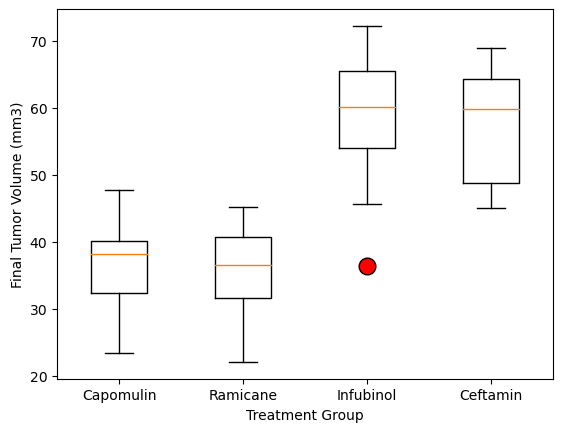

In [52]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_tumor_df.loc[final_tumor_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # Add subset to the tumor_volume list
    tumor_volume.append(tumor_vol)

# Create a figure and axis
fig, ax = plt.subplots()

# Create a boxplot for each treatment group
ax.boxplot(tumor_volume, labels=treatments, flierprops=dict(markerfacecolor='red', markersize=12))

# Set labels and title
ax.set_xlabel("Treatment Group")
ax.set_ylabel("Final Tumor Volume (mm3)")


# Show the plot
plt.show()


## Line and Scatter Plots

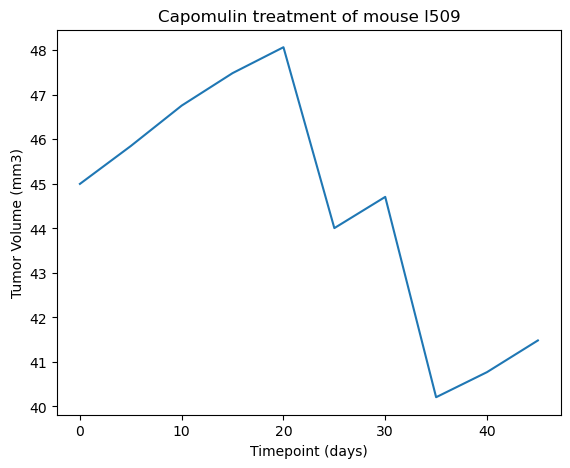

In [67]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter the data for Capomulin treatment
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]

# Select Mouse l509 from the Capomulin-treated mice 
selected_mouse = 'l509'
single_mouse_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == selected_mouse]

# Plot tumor volume vs time point for mouse l509
plt.figure(figsize=(6.5, 5))
plt.plot(single_mouse_df["Timepoint"], single_mouse_df["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin treatment of mouse {selected_mouse}")

plt.show()

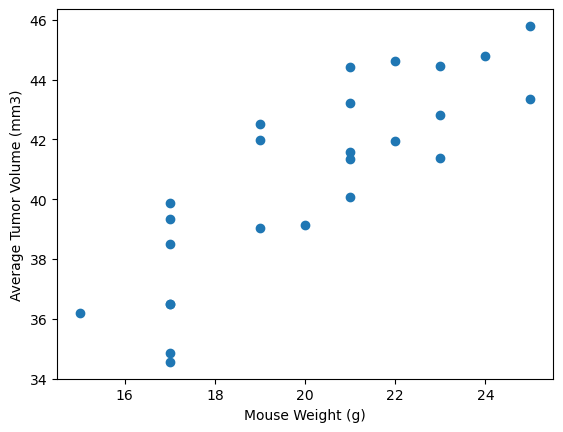

In [76]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter the data for Capomulin treatment
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse in the Capomulin regimen
average_tumor_volume = Capomulin_df.groupby(["Mouse ID"])[["Weight (g)", "Tumor Volume (mm3)"]].mean()
average_tumor_volume = average_tumor_volume.reset_index()  # Convert the grouped series back to a DataFrame

#Create a scatter plot with mouse weight on the x-axis and average tumor volume on the y-axis
plt.scatter(average_tumor_volume["Weight (g)"], average_tumor_volume["Tumor Volume (mm3)"], marker='o')
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


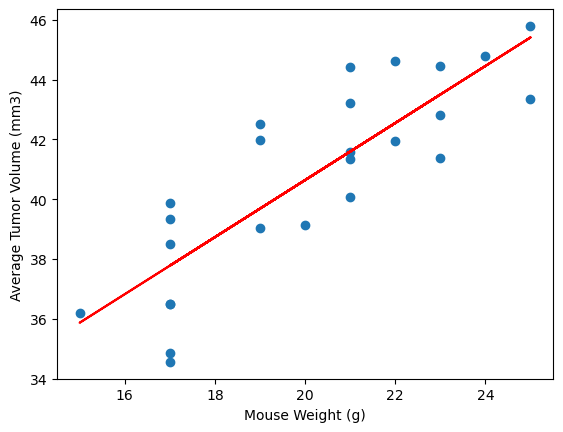

In [84]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Create a scatter plot with mouse weight on the x-axis and average tumor volume on the y-axis
plt.scatter(average_tumor_volume["Weight (g)"], average_tumor_volume["Tumor Volume (mm3)"], marker='o')
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Calculate the correlation coefficient
correlation_coefficient = st.pearsonr(average_tumor_volume["Weight (g)"], average_tumor_volume["Tumor Volume (mm3)"])[0]
correlation_coefficient_rounded = round(correlation_coefficient, 2)
print("The correlation between mouse weight and the average tumor volume is", correlation_coefficient_rounded)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(average_tumor_volume["Weight (g)"], average_tumor_volume["Tumor Volume (mm3)"])
plt.plot(average_tumor_volume["Weight (g)"], slope * average_tumor_volume["Weight (g)"] + intercept, color='red', label='Regression Line')


plt.show()

